# Visión Artificial con Redes Neuronales Profundas

*   Alfredo Cuesta
*   Juan José Pantrigo

## ¿Qué somos capaces de hacer?

* Detección y segmentación:  https://www.youtube.com/watch?v=OOT3UIXZztE
* Generación de imágenes: https://www.youtube.com/watch?v=JzgOfISLNjk
* Estimación de pose 3D a partir de imágenes 2D





## ¿Cómo se hace?

*  Modelo computacional por capas
* Cada capa procesa la salida de la capa anterior
* El procesado consiste en:

>1. Aplicar filtros de convolución para resaltar características visuales (bordes, esquinas, etc)
>1. Agrupar los píxeles más resaltados $\rightarrow$ reducción de tamaño

* Tras varias capas, combinar los pixels resultantes para **aprender a realizar la tarea**

## ¿Cómo puede aprender una máquina?
* Depende de la tarea
* Un caso sencillo: reconocer señales de tráfico 

  https://youtu.be/5ZQPbMyywvM
  
* Ingredientes:
> * Conjunto con (muchas) imágenes, $X$
> * Cada imagen debe tener asociada una etiqueta, $Y$
* Receta:
> * Introducir una imagen $x$ en la máquina
> * La máquina hace una predicción sobre la etiqueta de la imagen, $\hat{y}$
>* Medimos el error o pérdida (loss), $L = (y-\hat{y})^2$
>* Ajustamos los parámetros de la máquina para reducir el error 
>* Volver a empezar con otro ejemplo

## ¿Puedo hacerlo yo también?
* ¡¡ Software libre !!
  * Python
  * Keras
  * Tensorflow
  * GitHub
    ...
  
* PERO, en general, hace falta potencia computacional (GPU NVIDIA)

  $\rightarrow$ Con Google Colab se pueden aprender muchas técnicas (empleado en el MOVA-URJC)


## Manos a la obra

Vamos a reconocer dígitos manuscritos utilizando el conjunto de datos MNIST 

https://en.wikipedia.org/wiki/MNIST_database

In [1]:
#*********************
#  Importar módulos 
#*********************
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout
from keras.models import Model
from keras.utils import to_categorical

#*********************
# Variables globales 
#*********************
num_classes = 10 # Núm. de clases o etiquetas diferentes
N_epochs = 2     # Num. de veces que utilizamos el conjunto de datos
batch_size = 64  # Núm. de imágenes que usamos para ajustar la red en cada paso

#************************************
# Cargar el conjunto de datos MNIST
#************************************

(x_train, y_train), (x_test, y_test) = mnist.load_data()
#- x_train: imágenes para que la red aprenda
#- y_train: etiqueta de cada imagen
#- x_test:  imágenes para probar la red
#- y_test:  etiqueta de cada imagen

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [9]:
# ¡¡ Es importante conocer como son los datos !!
#  por ej. ¿¿ Qué dimensiones tienen ??

N_train,W,H = x_train.shape
N_test, W,H  = x_test.shape

print("Dims. del conjunto de entrenamiento:",N_train, W, H)
print("Dims. del conjunto de prueba (test):",N_test,  W, H)

Dims. del conjunto de entrenamiento: 60000 28 28
Dims. del conjunto de prueba (test): 10000 28 28


In [0]:
# También es importante preparar los datos para poder procesarlos:

# 1) Las imágenes deben tener 4 dimensiones: 
#     Núm.imagnes, Ancho(W), Alto(H), Profundidad de color (D)

D=1 #<- Las imagenes de este ejemplo son en 'escala de grises' 
x_input = x_train.reshape((N_train,W,H,D)) 

# 2) Las etiquetas (1,2,3....) deben tener formato 'one-hot'

y_1hot = to_categorical(y_train, num_classes=num_classes)


In [0]:
#***********************************
# Construcción de la red neuronal 
#***********************************

#-- Tamaño de los filtros de convolucion
N = 3
#-- Agrupamiento
S = 2
#-- Neuronas lineales para estimar la etiqueta
M = 32

#== Capa de entrada ================
x = Input(shape=(W,H,D))

#== Capa Convolucional =============
h1 = Conv2D(16, (N, N), activation='relu', padding='same')(x)
#== Capa de agrupamiento ===========
h2 = MaxPooling2D((S, S))(h1)
#== Capa Convolucional =============
h3 = Conv2D(32, (N, N), activation='relu', padding='same')(h2)
#== Capa de agrupamiento ===========
h4 = MaxPooling2D((S, S))(h3)
#== Capa Convolucional =============
h5 = Conv2D(64, (N, N), activation='relu', padding='same')(h4)
#== Capa de agrupamiento ===========
h6 = MaxPooling2D((S, S))(h5)
#== Combinar los pixels resultantes
h7 = Flatten()(h6)
h8 = Dense(M, activation='relu')(h7)

#== Producir una salida ============
yhat = Dense(num_classes, activation='softmax')(h8)


In [0]:
#*******************************
# Crear el 'objeto' CNN 
#  y añadir 
#  - mecánismo para optimizar
#  - funcion de pérdida
#*******************************
CNN = Model(x,yhat)
CNN.compile(optimizer='adam', loss='categorical_crossentropy')

In [16]:
#*********************
#  ¡¡ APRENDEMOS !!
#*********************

CNN.fit(x_input, y_1hot, epochs=N_epochs, batch_size=batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/2
60000/60000 [==============================] - 14s 227us/step - loss: 0.3808
Epoch 2/2
60000/60000 [==============================] - 9s 147us/step - loss: 0.0721


6 <-- etiqueta real
6 <-- etiqueta predicha


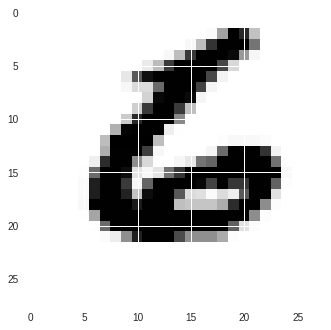

In [17]:
#************************************
#      ¿Qué tal ha funcionado?
#  ¿¿Qué hará con ejemplos nuevos??
#************************************

# Recordad que los datos deben tener 4 dims.
x_nuevos = x_test.reshape((N_test,W,H,D)) 

# Vamos a ver que dice la CNN sobre estos ejemplos:
prediccion_etiqueta = CNN.predict(x_nuevos)

# Pero...¿Qué tal funciona con la K-ésima imagen de prueba (test)?
k = 9999 #<-- elegir un número entre 0 y 9999
print(y_test[k] ,'<-- etiqueta real')
print(np.argmax(prediccion_etiqueta[k,:]) ,'<-- etiqueta predicha')
plt.imshow(x_test[k,:,:])

## Esperamos que os haya gustado :)

### Enlaces interesantes
* Tensorflow Playground: https://playground.tensorflow.org
* Para dibujar redes neuronales: http://alexlenail.me/NN-SVG/AlexNet.html 
* DeepLearning.ai: https://www.youtube.com/channel/UCcIXc5mJsHVYTZR1maL5l9w

Si quieres continuar tu formación en la URJC.
* Master Oficial en Visión Artificial URJC: https://mastervisionartificial.es/

Más sobre nosotros:
* Grupo de Computación de Altas Prestaciones y Optimización (CAPO): http://www.caporesearch.es
* Prof. Juan José Pantrigo: http://www.caporesearch.es/jjpantrigo
* Prof. Alfredo Cuesta: http://www.caporesearch.es/acuesta

# GRACIAS POR VENIR